<a href="https://colab.research.google.com/github/skhan226/ROC-Curve-in-Python-Machine-Learning-in-Python/blob/main/ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**

Shoeb Ahmed Khan

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using the Iris data set as an example.

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## **1. Importing the dataset**

In [1]:
! wget https://bigblue.depaul.edu/jlee141/econdata/eco520/loan_default.csv

--2022-01-06 18:30:43--  https://bigblue.depaul.edu/jlee141/econdata/eco520/loan_default.csv
Resolving bigblue.depaul.edu (bigblue.depaul.edu)... 216.220.181.67
Connecting to bigblue.depaul.edu (bigblue.depaul.edu)|216.220.181.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62445 (61K) [text/csv]
Saving to: ‘loan_default.csv’

loan_default.csv    100%[===================>]  60.98K  --.-KB/s    in 0.02s   

2022-01-06 18:30:43 (2.61 MB/s) - ‘loan_default.csv’ saved [62445/62445]



In [4]:
import pandas as pd
loan = pd.read_csv("loan_default.csv")

### **1.2. Preprocessing the data **

1.Finding the unique variables in **Gender** , **Emp_status** and **Marital_status**, assigning arbitrary code to each unique value.                           

2.Shuffling the dataset

3.Dropping the Default value and from the data set and creating a differnt dataset with just the Default values

In [7]:
loan["Gender"].unique()

array([0, 1], dtype=int8)

In [8]:
loan.Gender=loan["Gender"].astype("category").cat.codes

In [9]:
loan["Emp_status"].unique()

array(['employed', 'unemployed'], dtype=object)

In [10]:
loan.Emp_status=loan["Emp_status"].astype("category").cat.codes

In [11]:
loan['Marital_status '].unique()

array(['Single', 'Married'], dtype=object)

In [12]:
loan['Marital_status ']=loan['Marital_status '].astype("category").cat.codes

In [13]:
loan

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,0,988,15,796,0,1,1,0,0,0,0,1536,3455,12,38,1
1,0,458,15,813,0,1,1,0,0,0,0,947,3600,25,36,1
2,0,158,14,756,0,1,0,1,0,0,0,1678,3093,43,34,1
3,1,300,25,737,0,1,0,0,0,1,0,1804,2449,0,29,1
4,1,63,24,662,0,1,0,0,0,1,1,1184,2867,4,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,17,21,562,1,0,1,0,0,0,1,1328,2658,118,28,5
996,0,590,18,873,0,1,1,0,0,0,1,1433,3469,108,29,5
997,0,343,16,824,1,0,0,1,0,0,1,1465,3426,99,31,4
998,0,709,16,811,1,0,1,0,0,0,1,1359,3114,113,28,6


In [17]:
import sklearn
from sklearn import preprocessing
loan = sklearn.utils.shuffle(loan)

In [18]:
X = loan.drop("Default", axis=1).values
Y = loan["Default"].values

In [20]:
X.shape,Y.shape

((1000, 15), (1000,))

## **Data splitting**

In [21]:
from sklearn.model_selection import  train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## **Build classification model**

In [24]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Random Forest

In [25]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [27]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## **Prediction probabilities** $^2$

In [33]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [36]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

## **Computing AUROC and ROC curve values**

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [39]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [40]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.960
Naive Bayes: AUROC = 0.900


### **Calculate ROC curve**

In [41]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

## **Plot the ROC curve**

In [42]:
import matplotlib.pyplot as plt

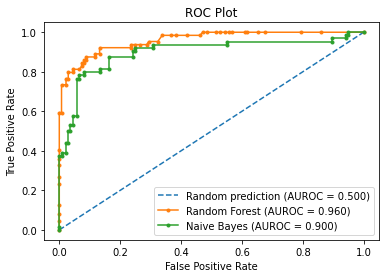

In [43]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()